<a href="https://colab.research.google.com/github/AhmedElrifo/Predicting-satisfaction/blob/master/just_3_66_error_for_satisfaction_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df=pd.read_csv('/content/train[1].csv')
test_df=pd.read_csv('/content/test[1].csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# Exploraory analysis

In [3]:
import matplotlib.pyplot as plt
print(train_df.info())
print('\n')
print(train_df.describe())
print('\n')
print(train_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
print(test_df.info())
print('\n')
print(test_df.describe())
print('\n')
print(test_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [5]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
train_df.rename({'Unnamed: 0':'a'},inplace=True,  axis="columns",)
train_df.drop('a',axis=1,inplace=True)

# filling the missing values in Arrival Delay in Minutes

In [7]:
train_df.fillna(train_df['Arrival Delay in Minutes'].median(),inplace=True)
test_df.fillna(test_df['Arrival Delay in Minutes'].median(),inplace=True)

# starting to know the relations between the features

In [8]:


train_df['satisfaction']=train_df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


test_df['satisfaction']=test_df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})

In [9]:
train_df['satisfaction']

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

In [10]:
train_df[['satisfaction','Gender']].groupby(['Gender']).mean().sort_values(['satisfaction'],ignore_index=True)

,satisfaction
0,0.427371
1,0.439475


# no big effect from the gender

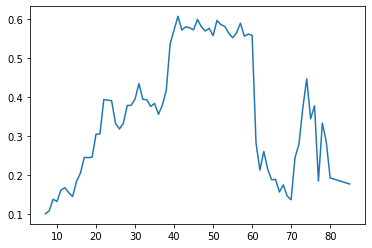

In [11]:
train_df[['satisfaction','Age']].groupby(['Age']).mean().sort_values(['satisfaction'],ignore_index=True)
plt.figure((1))
plt.plot(train_df[['satisfaction','Age']].groupby(['Age']).mean(),label=['satisfaction','Gender'])
plt.show()

# Age affects it a lot

In [12]:

train_df[['satisfaction','Customer Type']].groupby(['Customer Type']).mean().sort_values(['satisfaction'],ignore_index=True)

,satisfaction
0,0.236658
1,0.477291


In [13]:
train_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:

train_df[['satisfaction','Type of Travel']].groupby(['Type of Travel']).mean().sort_values(['satisfaction'],ignore_index=True)

,satisfaction
0,0.101678
1,0.582597


Wow this affects the satisfaction a loooooot

In [15]:

train_df[['satisfaction','Class']].groupby(['Class']).mean().sort_values(['satisfaction'],ignore_index=True)

,satisfaction
0,0.186138
1,0.246064
2,0.694251


Wow this affects the satisfaction a loooooot again

In [16]:
train_df['Inflight wifi service'].unique()

array([3, 2, 4, 1, 5, 0])

In [17]:
print(train_df[['satisfaction','Flight Distance']].groupby(['satisfaction']).mean().sort_values(['satisfaction'],ignore_index=True))
print(
train_df[['satisfaction','Inflight wifi service']].groupby(['Inflight wifi service']).mean().sort_values(['satisfaction'],ignore_index=True)
)

   Flight Distance
0       928.919971
1      1530.140255
   satisfaction
0      0.248664
1      0.250580
2      0.325448
3      0.598969
4      0.990758
5      0.997422


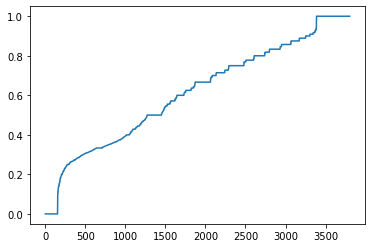

In [18]:
plt.figure(2)
plt.plot((train_df[['satisfaction','Flight Distance']].groupby(['Flight Distance']).mean().sort_values(['satisfaction'],ignore_index=True)))
plt.show()

Both of them afects the results

In [19]:
train_df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [20]:
print(train_df[['satisfaction','Departure/Arrival time convenient']].groupby(['Departure/Arrival time convenient']).mean().sort_values(['satisfaction'],ignore_index=True))
print(
train_df[['satisfaction','Ease of Online booking']].groupby(['Ease of Online booking']).mean().sort_values(['satisfaction'],ignore_index=True)
)

   satisfaction
0      0.387771
1      0.425300
2      0.438217
3      0.445407
4      0.475472
5      0.486579
   satisfaction
0      0.303942
1      0.308274
2      0.376034
3      0.530939
4      0.664141
5      0.738286


'Departure/Arrival time convenient' isn't so relevent

In [21]:
print(train_df[['satisfaction','Gate location']].groupby(['Gate location']).mean().sort_values(['satisfaction'],ignore_index=True))
print(
train_df[['satisfaction','Food and drink']].groupby(['Food and drink']).mean().sort_values(['satisfaction'],ignore_index=True)
)

   satisfaction
0      0.347202
1      0.388520
2      0.460712
3      0.495559
4      0.572376
5      1.000000
   satisfaction
0      0.200047
1      0.387939
2      0.396368
3      0.467290
4      0.524981
5      0.549007


In [22]:
print('Online boarding')
print(train_df[['satisfaction','Online boarding']].groupby(['Online boarding']).mean().sort_values(['satisfaction'],ignore_index=True))
print('\n Seat comfort')
print(
train_df[['satisfaction','Seat comfort']].groupby(['Seat comfort']).mean().sort_values(['satisfaction'],ignore_index=True)
)

Online boarding
   satisfaction
0      0.115338
1      0.135709
2      0.137767
3      0.556425
4      0.623041
5      0.871771

 Seat comfort
   satisfaction
0      0.000000
1      0.211543
2      0.223188
3      0.224139
4      0.561152
5      0.650208


In [23]:
'Inflight entertainment', 'On-board service'
print('Inflight entertainment')
print(train_df[['satisfaction','Inflight entertainment']].groupby(['Inflight entertainment']).mean().sort_values(['satisfaction'],ignore_index=True))
print('\n ')
print('On-board service')
print(
train_df[['satisfaction','On-board service']].groupby(['On-board service']).mean().sort_values(['satisfaction'],ignore_index=True)
)

Inflight entertainment
   satisfaction
0      0.000000
1      0.139846
2      0.213302
3      0.270077
4      0.611766
5      0.648435

 
On-board service
   satisfaction
0      0.000000
1      0.193733
2      0.255705
3      0.315683
4      0.536852
5      0.642422


In [24]:

       
       
       
    
print('Leg room service')
print(train_df[['satisfaction','Leg room service']].groupby(['Leg room service']).mean().sort_values(['satisfaction'],ignore_index=True))
print('\n ')
print('Baggage handling')
print(
train_df[['satisfaction','Baggage handling']].groupby(['Baggage handling']).mean().sort_values(['satisfaction'],ignore_index=True)
)


print( 'Checkin service')
print(train_df[['satisfaction', 'Checkin service']].groupby([ 'Checkin service']).mean().sort_values(['satisfaction'],ignore_index=True))
print('\n ')
print('Inflight service')
print(
train_df[['satisfaction','Inflight service']].groupby(['Inflight service']).mean().sort_values(['satisfaction'],ignore_index=True)
)



print('Departure Delay in Minutes')
print(train_df[['satisfaction','Departure Delay in Minutes']].groupby(['satisfaction']).mean().sort_values(['satisfaction'],ignore_index=True))
print('\n ')
print('Arrival Delay in Minutes')
print(
train_df[['satisfaction','Arrival Delay in Minutes']].groupby(['satisfaction']).mean().sort_values(['satisfaction'],ignore_index=True)
)

Leg room service
   satisfaction
0      0.202840
1      0.272415
2      0.274673
3      0.351695
4      0.582306
5      0.614465

 
Baggage handling
   satisfaction
0      0.235847
1      0.295460
2      0.297637
3      0.480914
4      0.612694
Checkin service
   satisfaction
0      0.000000
1      0.239255
2      0.252307
3      0.448288
4      0.459921
5      0.609777

 
Inflight service
   satisfaction
0      0.000000
1      0.238977
2      0.289949
3      0.301213
4      0.477770
5      0.609972
Departure Delay in Minutes
   Departure Delay in Minutes
0                   16.503728
1                   12.608084

 
Arrival Delay in Minutes
   Arrival Delay in Minutes
0                 17.074594
1                 12.594892


In [25]:
print(train_df[['Arrival Delay in Minutes','satisfaction']].corr())
print(train_df[['Departure Delay in Minutes','satisfaction']].corr())

                          Arrival Delay in Minutes  satisfaction
Arrival Delay in Minutes                  1.000000     -0.057435
satisfaction                             -0.057435      1.000000
                            Departure Delay in Minutes  satisfaction
Departure Delay in Minutes                    1.000000     -0.050494
satisfaction                                 -0.050494      1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


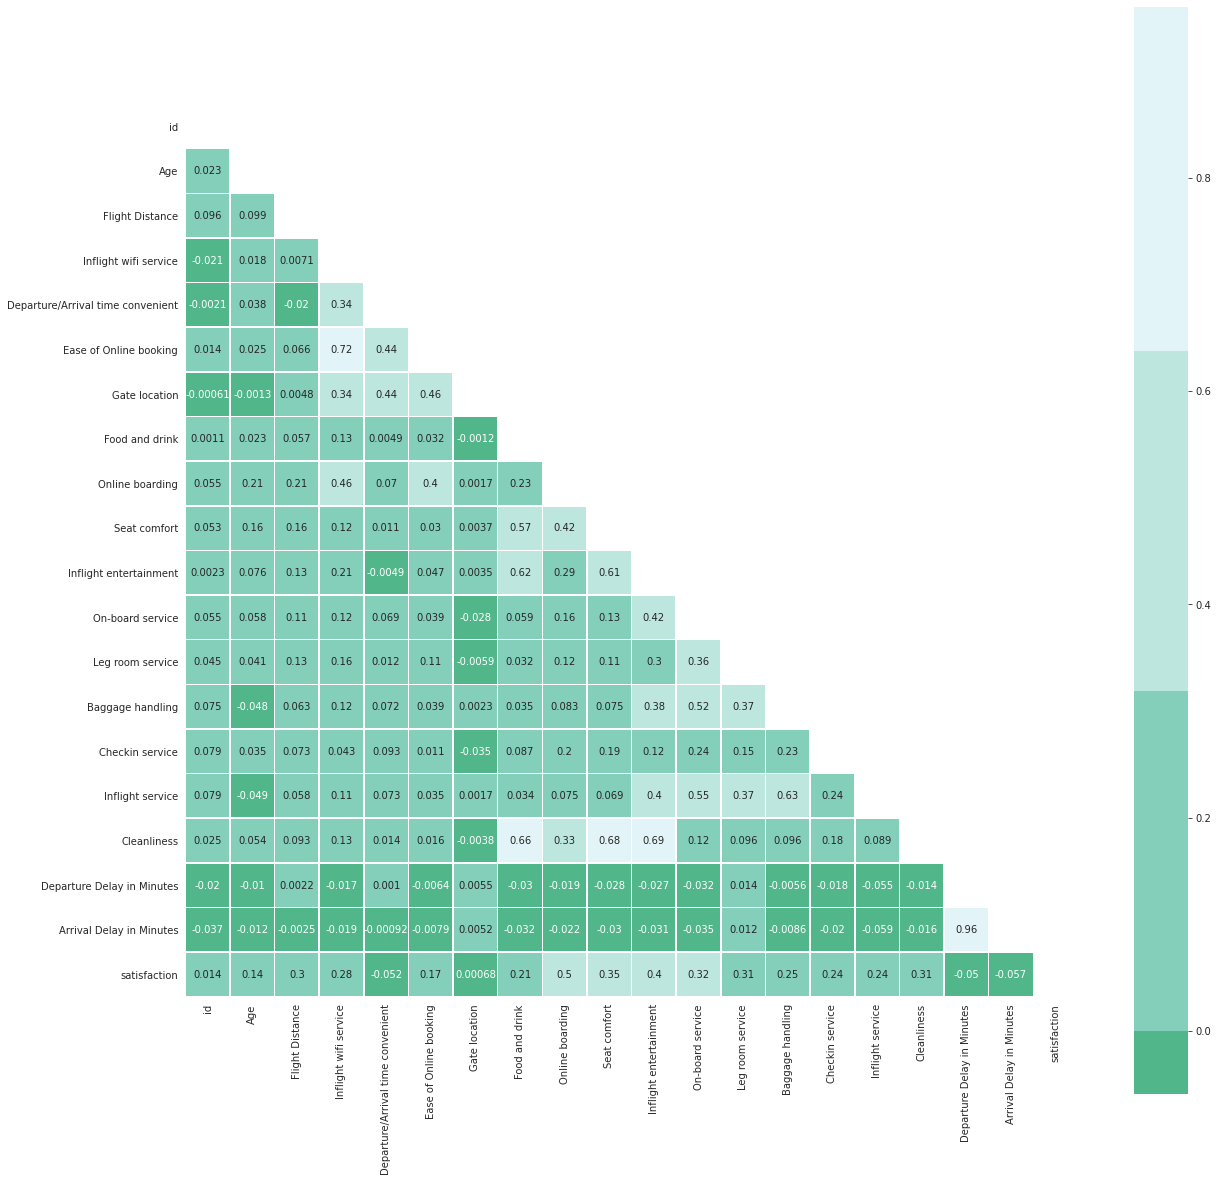

In [26]:
import seaborn as sns
corr=train_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, annot = True, mask=mask, cmap=sns.color_palette("BuGn_r"), center=0,
            square=True, linewidths=.5)
    
    
#sns.heatmap(, cmap="YlGnBu",mask)
plt.show()

* Best features - Online Booking, Class, and Type of Travel
* Worst features - Gate location, Gender, and Departure/Arrival Time Convenient

# Converting it to numbers

In [27]:
train_df.select_dtypes(include='object')

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco
103900,Male,Loyal Customer,Business travel,Business
103901,Male,disloyal Customer,Business travel,Business
103902,Female,disloyal Customer,Business travel,Eco


In [28]:
objectcols=['Gender','Customer Type','Type of Travel','Class']
train_df.drop('id',axis=1,inplace=True)


test_df.rename({'Unnamed: 0':'a'},inplace=True,  axis="columns",)
test_df.drop('a',axis=1,inplace=True)


test_df.drop('id',axis=1,inplace=True)
train_df=pd.get_dummies(train_df)
train_df.head()



print(test_df.isnull().sum())



test_df=pd.get_dummies(test_df)

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


For test

In [29]:


feature=['satisfaction']
y_train=train_df[feature].to_numpy()
X_train=train_df.drop(feature,axis=1)
y_test=test_df[feature].to_numpy()
X_test=test_df.drop(feature,axis=1)



y_train.shape ,X_train.shape ,y_test.shape , X_test.shape

((103904, 1), (103904, 27), (25976, 1), (25976, 27))

In [30]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

from sklearn.preprocessing import StandardScaler
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

ML libraries we will use

In [31]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
Y_train=y_train
Y_test=y_test
from sklearn.metrics import mean_absolute_error

In [33]:
# Logistic Regression

logreg = LogisticRegression(max_iter=100,tol=0.01)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.79

In [34]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)

acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.57

In [35]:
# KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_knn

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


8.99

In [36]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16.81

In [43]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


12.9

In [38]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13.04

In [39]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_decision_tree

5.27

In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
acc_random_forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


3.7

In [41]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, Y_train)
Y_pred = my_model.predict(X_test)
XGBacc = round(mean_absolute_error(Y_test,Y_pred) * 100, 2)
XGBacc

[16:21:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


13.3

In [44]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','XGBRegressor'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,XGBacc]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,Random Forest,3.70
0,Support Vector Machines,4.57
7,Decision Tree,5.27
1,KNN,8.99
2,Logistic Regression,12.79
6,Linear SVC,12.90
5,Stochastic Gradient Decent,13.04
8,XGBRegressor,13.30
4,Perceptron,16.81


<BarContainer object of 9 artists>

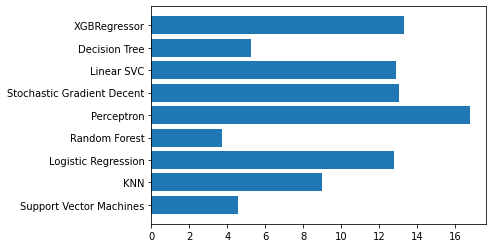

In [45]:
import matplotlib.pyplot as plt
plt.barh(models['Model'],models['Score'])

# Random Forest is the best

In [46]:
data=pd.read_csv('/content/test[1].csv')

In [47]:
submission = pd.DataFrame({
        "PassengerId": data['id'],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)